[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


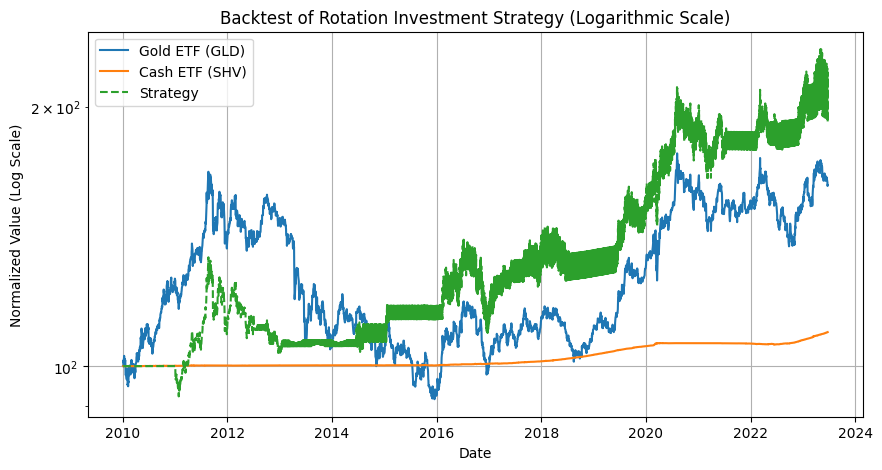

In [5]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define the tickers for Gold ETF and Cash ETF
gold_ticker = 'GLD'
cash_ticker = 'SHV'

# Define the time range for backtesting
start_date = '2010-01-01'
end_date = '2023-06-25'

# Fetch the data
gold_data = yf.download(gold_ticker, start=start_date, end=end_date)
cash_data = yf.download(cash_ticker, start=start_date, end=end_date)

# Calculate the rolling 12-month returns
gold_data['12M_Return'] = gold_data['Adj Close'].pct_change(252)  # 252 trading days in a year
cash_data['12M_Return'] = cash_data['Adj Close'].pct_change(252)

# Create a DataFrame to store strategy returns
strategy_returns = pd.DataFrame(index=gold_data.index)
strategy_returns['Gold'] = gold_data['Adj Close']
strategy_returns['SHV'] = cash_data['Adj Close']
strategy_returns['Strategy'] = 1.0  # Initial investment

# Implement the rotation strategy
for i, date in enumerate(strategy_returns.index[253:]):  # Start after 252 days
    previous_date = strategy_returns.index[i + 252 - 1]
    if date in gold_data.index and date in cash_data.index:
        if gold_data.loc[date, '12M_Return'] > cash_data.loc[date, '12M_Return']:
            # Allocate 100% to Gold
            daily_return = gold_data.loc[date, 'Adj Close'] / gold_data.loc[previous_date, 'Adj Close']
        else:
            # Allocate 100% to Cash (SHV)
            daily_return = cash_data.loc[date, 'Adj Close'] / cash_data.loc[previous_date, 'Adj Close']
        
        # Update the strategy value
        strategy_returns.loc[date, 'Strategy'] = strategy_returns.loc[previous_date, 'Strategy'] * daily_return

# Normalize the data to 100 for plotting
strategy_returns_normalized = (strategy_returns / strategy_returns.iloc[0]) * 100

# Plot the results with logarithmic scale on the y-axis
plt.figure(figsize=(10, 5))
plt.semilogy(strategy_returns_normalized['Gold'], label='Gold ETF (GLD)')
plt.semilogy(strategy_returns_normalized['SHV'], label='Cash ETF (SHV)')
plt.semilogy(strategy_returns_normalized['Strategy'], label='Strategy', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Normalized Value (Log Scale)')
plt.title('Backtest of Rotation Investment Strategy (Logarithmic Scale)')
plt.legend()
plt.grid(True)
plt.show()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


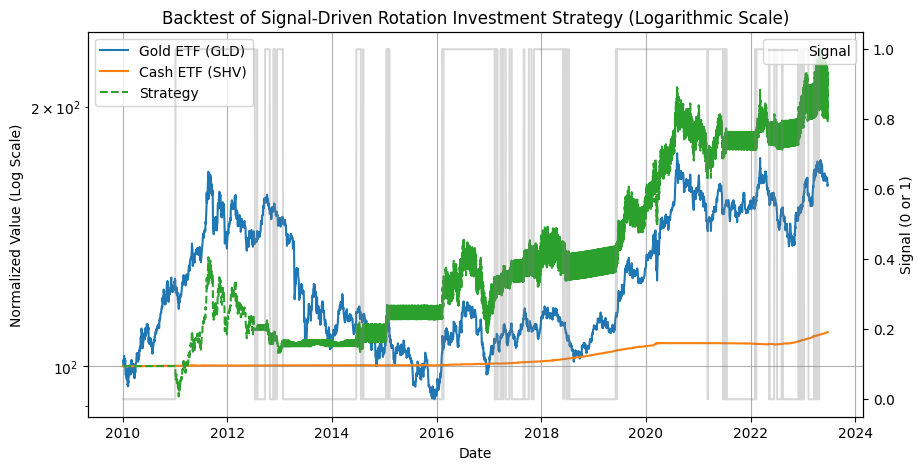

In [6]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define the tickers for Gold ETF and Cash ETF
gold_ticker = 'GLD'
cash_ticker = 'SHV'

# Define the time range for backtesting
start_date = '2010-01-01'
end_date = '2023-06-25'

# Fetch the data
gold_data = yf.download(gold_ticker, start=start_date, end=end_date)
cash_data = yf.download(cash_ticker, start=start_date, end=end_date)

# Calculate the rolling 12-month returns
gold_data['12M_Return'] = gold_data['Adj Close'].pct_change(252)  # 252 trading days in a year
cash_data['12M_Return'] = cash_data['Adj Close'].pct_change(252)

# Create a DataFrame to store strategy returns and signals
strategy_returns = pd.DataFrame(index=gold_data.index)
strategy_returns['Gold'] = gold_data['Adj Close']
strategy_returns['SHV'] = cash_data['Adj Close']
strategy_returns['Strategy'] = 1.0  # Initial investment
strategy_returns['Signal'] = 0

# Implement the signal-driven rotation strategy
for i, date in enumerate(strategy_returns.index[253:]):  # Start after 252 days
    previous_date = strategy_returns.index[i + 252 - 1]
    if date in gold_data.index and date in cash_data.index:
        # Compute the signal (1 for Gold, 0 for SHV)
        signal = int(gold_data.loc[date, '12M_Return'] > cash_data.loc[date, '12M_Return'])
        strategy_returns.loc[date, 'Signal'] = signal
        
        # Use the signal to determine the daily return
        if signal == 1:
            daily_return = gold_data.loc[date, 'Adj Close'] / gold_data.loc[previous_date, 'Adj Close']
        else:
            daily_return = cash_data.loc[date, 'Adj Close'] / cash_data.loc[previous_date, 'Adj Close']
        
        # Update the strategy value
        strategy_returns.loc[date, 'Strategy'] = strategy_returns.loc[previous_date, 'Strategy'] * daily_return

# Normalize the data to 100 for plotting
strategy_returns_normalized = (strategy_returns / strategy_returns.iloc[0]) * 100

# Plot the results with logarithmic scale on the y-axis
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot the returns
ax1.semilogy(strategy_returns_normalized['Gold'], label='Gold ETF (GLD)')
ax1.semilogy(strategy_returns_normalized['SHV'], label='Cash ETF (SHV)')
ax1.semilogy(strategy_returns_normalized['Strategy'], label='Strategy', linestyle='--')
ax1.set_xlabel('Date')
ax1.set_ylabel('Normalized Value (Log Scale)')
ax1.set_title('Backtest of Signal-Driven Rotation Investment Strategy (Logarithmic Scale)')
ax1.legend(loc='upper left')
ax1.grid(True)

# Plot the signals on a second y-axis
ax2 = ax1.twinx()
ax2.plot(strategy_returns['Signal'], label='Signal', color='grey', alpha=0.3)
ax2.set_ylabel('Signal (0 or 1)')
ax2.legend(loc='upper right')

plt.show()


[*********************100%***********************]  1 of 1 completed


C:\Users\mehdi\AppData\Local\Temp\ipykernel_2396\2345644444.py:17: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  data.loc[200:, 'signal'] = np.where(data['Close'][200:] > data['sma200'][200:], 1, 0)


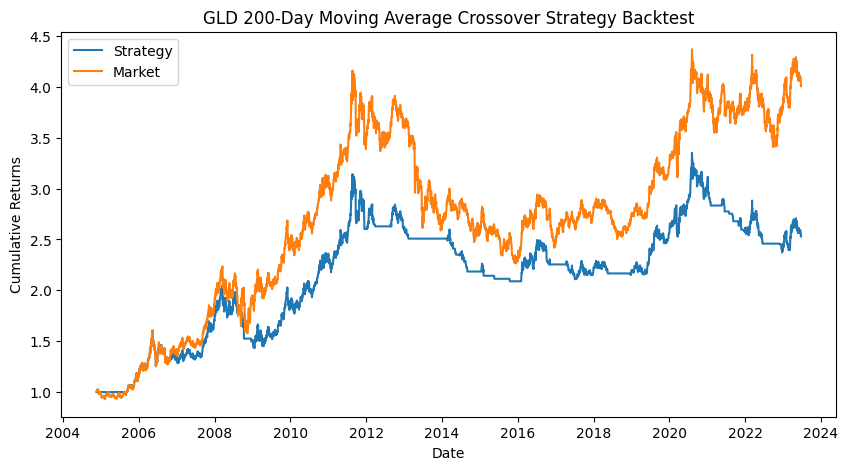

Strategy CAGR: 5.12%
Market CAGR: 7.76%
Strategy Sharpe Ratio: 0.36
Market Sharpe Ratio: 0.44
Strategy Max Drawdown: -33.52%
Market Max Drawdown: -45.56%


In [7]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# Define the ticker symbol of the index you want to backtest
TICKER_SYMBOL = 'GLD'

# Download historical data for the specified index
data = yf.download(TICKER_SYMBOL, start="2000-01-01")

# Calculate the 200-day simple moving average
data['sma200'] = data['Close'].rolling(window=200).mean()

# Generate trading signals based on the crossover strategy
data['signal'] = 0
data.loc[200:, 'signal'] = np.where(data['Close'][200:] > data['sma200'][200:], 1, 0)
data['positions'] = data['signal'].diff()

# Backtest the strategy and calculate returns
data['strategy_returns'] = data['Close'].pct_change() * data['signal'].shift(1)
data['market_returns'] = data['Close'].pct_change()

# Calculate the cumulative returns
data['strategy_cumulative_returns'] = (1 + data['strategy_returns']).cumprod()
data['market_cumulative_returns'] = (1 + data['market_returns']).cumprod()

# Compute CAGR
years = (data.index[-1] - data.index[0]).days / 365.0
strategy_cagr = (data['strategy_cumulative_returns'][-1])**(1/years) - 1
market_cagr = (data['market_cumulative_returns'][-1])**(1/years) - 1

# Compute Sharpe Ratio (assuming a risk-free rate of 0)
strategy_std = data['strategy_returns'].std() * np.sqrt(252)  # Annualized standard deviation
strategy_sharpe_ratio = (strategy_cagr - 0) / strategy_std
market_std = data['market_returns'].std() * np.sqrt(252)  # Annualized standard deviation
market_sharpe_ratio = (market_cagr - 0) / market_std

# Compute Maximum Drawdown for Strategy
data['strategy_cummax'] = data['strategy_cumulative_returns'].cummax()
data['strategy_drawdown'] = data['strategy_cumulative_returns'] / data['strategy_cummax'] - 1
strategy_max_drawdown = data['strategy_drawdown'].min()

# Compute Maximum Drawdown for Market
data['market_cummax'] = data['market_cumulative_returns'].cummax()
data['market_drawdown'] = data['market_cumulative_returns'] / data['market_cummax'] - 1
market_max_drawdown = data['market_drawdown'].min()

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(data['strategy_cumulative_returns'], label='Strategy')
plt.plot(data['market_cumulative_returns'], label='Market')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.title(f'{TICKER_SYMBOL} 200-Day Moving Average Crossover Strategy Backtest')
plt.show()

# Display the computed metrics
print(f"Strategy CAGR: {strategy_cagr * 100:.2f}%")
print(f"Market CAGR: {market_cagr * 100:.2f}%")
print(f"Strategy Sharpe Ratio: {strategy_sharpe_ratio:.2f}")
print(f"Market Sharpe Ratio: {market_sharpe_ratio:.2f}")
print(f"Strategy Max Drawdown: {strategy_max_drawdown * 100:.2f}%")
print(f"Market Max Drawdown: {market_max_drawdown * 100:.2f}%")


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


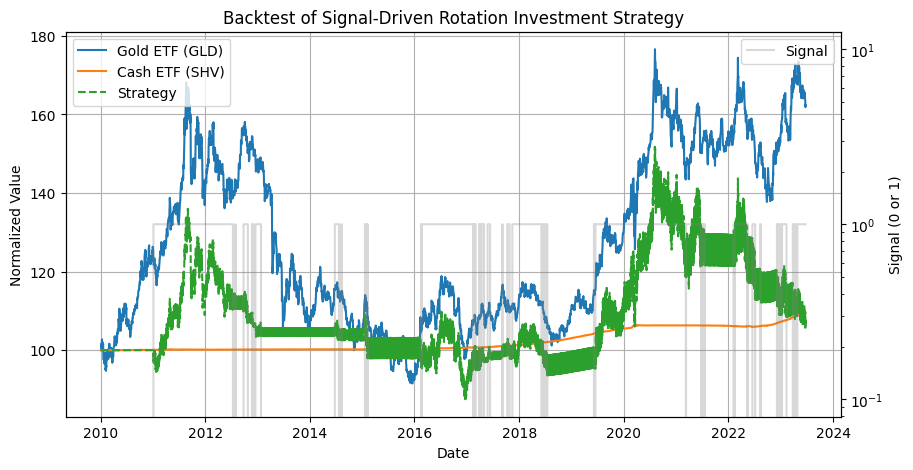

In [13]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define the tickers for Gold ETF and Cash ETF
gold_ticker = 'GLD'
cash_ticker = 'SHV'

# Define the time range for backtesting
start_date = '2010-01-01'
end_date = '2023-06-25'

# Fetch the data
gold_data = yf.download(gold_ticker, start=start_date, end=end_date)
cash_data = yf.download(cash_ticker, start=start_date, end=end_date)

# Calculate the rolling 12-month returns
gold_data['12M_Return'] = gold_data['Adj Close'].pct_change(252)  # 252 trading days in a year
cash_data['12M_Return'] = cash_data['Adj Close'].pct_change(252)

# Create a DataFrame to store strategy returns and signals
strategy_returns = pd.DataFrame(index=gold_data.index)
strategy_returns['Gold'] = gold_data['Adj Close']
strategy_returns['SHV'] = cash_data['Adj Close']
strategy_returns['Strategy'] = 1.0  # Initial investment
strategy_returns['Signal'] = 0

# Implement the signal-driven rotation strategy
for i, date in enumerate(strategy_returns.index[253:]):  # Start after 63 days
    previous_date = strategy_returns.index[i + 252 - 1]
    
    # Compute the signal for the previous date (1 for Gold, 0 for SHV)
    if previous_date in gold_data.index and previous_date in cash_data.index:
        signal = int(gold_data.loc[previous_date, '12M_Return'] > cash_data.loc[previous_date, '12M_Return'])
    else:
        signal = 0
        
    strategy_returns.loc[date, 'Signal'] = signal
    
    # Use the signal to determine the daily return
    if signal == 1:
        daily_return = gold_data.loc[date, 'Adj Close'] / gold_data.loc[previous_date, 'Adj Close']
    else:
        daily_return = cash_data.loc[date, 'Adj Close'] / cash_data.loc[previous_date, 'Adj Close']
    
    # Update the strategy value
    strategy_returns.loc[date, 'Strategy'] = strategy_returns.loc[previous_date, 'Strategy'] * daily_return

# Normalize the data to 100 for plotting
strategy_returns_normalized = (strategy_returns / strategy_returns.iloc[0]) * 100

# Plot the results with logarithmic scale on the y-axis
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot the returns
ax1.plot(strategy_returns_normalized['Gold'], label='Gold ETF (GLD)')
ax1.plot(strategy_returns_normalized['SHV'], label='Cash ETF (SHV)')
ax1.plot(strategy_returns_normalized['Strategy'], label='Strategy', linestyle='--')
ax1.set_xlabel('Date')
ax1.set_ylabel('Normalized Value')
ax1.set_title('Backtest of Signal-Driven Rotation Investment Strategy')
ax1.legend(loc='upper left')
ax1.grid(True)

# Plot the signals on a second y-axis
ax2 = ax1.twinx()
ax2.plot(strategy_returns['Signal'], label='Signal', color='grey', alpha=0.3)
ax2.set_ylabel('Signal (0 or 1)')
ax2.legend(loc='upper right')

plt.yscale("log")
plt.show()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


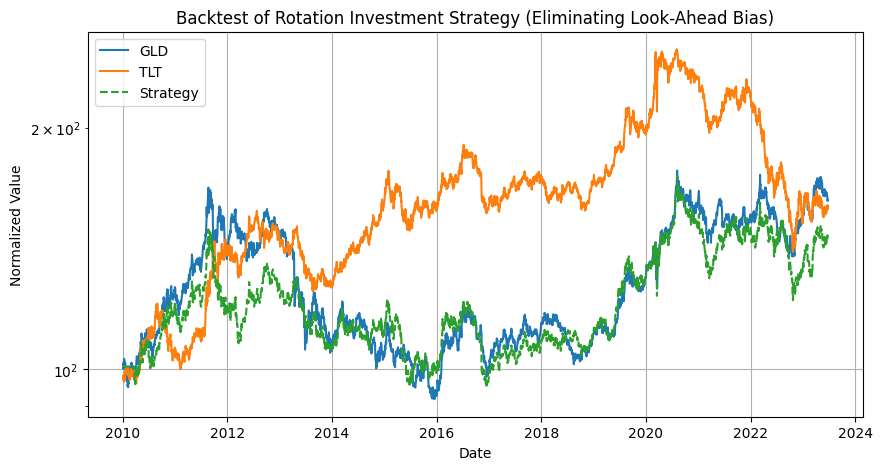

In [18]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define the tickers
gld_ticker = 'GLD'
tlt_ticker = 'TLT'

# Define the time range for backtesting
start_date = '2010-01-01'
end_date = '2023-06-25'

# Fetch the data
gld_data = yf.download(gld_ticker, start=start_date, end=end_date)
tlt_data = yf.download(tlt_ticker, start=start_date, end=end_date)

# Calculate the 200-day moving average for GLD
gld_data['200D_MA'] = gld_data['Adj Close'].rolling(window=50).mean()

# Create a DataFrame to store strategy returns
strategy_returns = pd.DataFrame(index=gld_data.index)
strategy_returns['GLD'] = gld_data['Adj Close']
strategy_returns['TLT'] = tlt_data['Adj Close']
strategy_returns['Strategy'] = 1.0  # Initial investment

# Implement the rotation strategy
for i, date in enumerate(strategy_returns.index[50:]):  # Start after 200 days
    previous_date = strategy_returns.index[i + 50 - 1]
    
    # Check if GLD was below its 200-day moving average as of the previous day
    if gld_data.loc[previous_date, 'Adj Close'] < gld_data.loc[previous_date, '200D_MA']:
        # Go into TLT
        daily_return = tlt_data.loc[date, 'Adj Close'] / tlt_data.loc[previous_date, 'Adj Close']
    else:
        # Go into GLD
        daily_return = gld_data.loc[date, 'Adj Close'] / gld_data.loc[previous_date, 'Adj Close']
    
    # Update the strategy value
    strategy_returns.loc[date, 'Strategy'] = strategy_returns.loc[previous_date, 'Strategy'] * daily_return

# Normalize the data to 100 for plotting
strategy_returns_normalized = (strategy_returns / strategy_returns.iloc[50]) * 100

# Plot the results with logarithmic scale on the y-axis
plt.figure(figsize=(10, 5))

# Plot the returns
plt.plot(strategy_returns_normalized['GLD'], label='GLD')
plt.plot(strategy_returns_normalized['TLT'], label='TLT')
plt.plot(strategy_returns_normalized['Strategy'], label='Strategy', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.title('Backtest of Rotation Investment Strategy (Eliminating Look-Ahead Bias)')
plt.legend(loc='upper left')
plt.grid(True)
plt.yscale("log")
plt.show()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


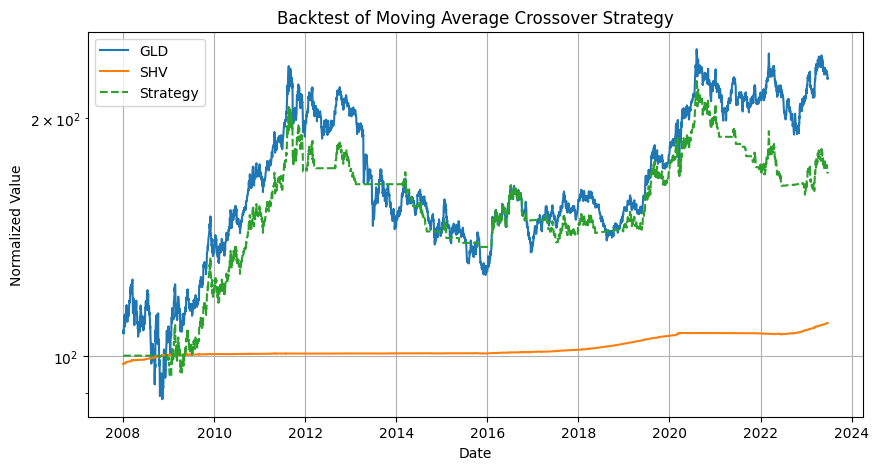

In [22]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define the tickers
gld_ticker = 'GLD'
shv_ticker = 'SHV'

# Define the time range for backtesting
start_date = '2008-01-01'
end_date = '2023-06-25'

# Fetch the data
gld_data = yf.download(gld_ticker, start=start_date, end=end_date)
shv_data = yf.download(shv_ticker, start=start_date, end=end_date)

# Calculate the 200-day moving average for GLD
gld_data['200D_MA'] = gld_data['Adj Close'].rolling(window=200).mean()

# Create a DataFrame to store strategy returns
strategy_returns = pd.DataFrame(index=gld_data.index)
strategy_returns['GLD'] = gld_data['Adj Close']
strategy_returns['SHV'] = shv_data['Adj Close']
strategy_returns['Strategy'] = 1.0  # Initial investment

# Implement the rotation strategy
for i, date in enumerate(strategy_returns.index[200:]):  # Start after 200 days
    previous_date = strategy_returns.index[i + 200 - 1]
    
    # Check if GLD was above its 200-day moving average as of the previous day
    if gld_data.loc[previous_date, 'Adj Close'] > gld_data.loc[previous_date, '200D_MA']:
        # Invest in GLD
        daily_return = gld_data.loc[date, 'Adj Close'] / gld_data.loc[previous_date, 'Adj Close']
    else:
        # Invest in SHV
        daily_return = shv_data.loc[date, 'Adj Close'] / shv_data.loc[previous_date, 'Adj Close']
    
    # Update the strategy value
    strategy_returns.loc[date, 'Strategy'] = strategy_returns.loc[previous_date, 'Strategy'] * daily_return

# Normalize the data to 100 for plotting
strategy_returns_normalized = (strategy_returns / strategy_returns.iloc[200]) * 100

# Plot the results with logarithmic scale on the y-axis
plt.figure(figsize=(10, 5))

# Plot the returns
plt.plot(strategy_returns_normalized['GLD'], label='GLD')
plt.plot(strategy_returns_normalized['SHV'], label='SHV')
plt.plot(strategy_returns_normalized['Strategy'], label='Strategy', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.title('Backtest of Moving Average Crossover Strategy')
plt.legend(loc='upper left')
plt.grid(True)
plt.yscale("log")
plt.show()
